In [1]:
import sys
import os
# Adds the project root directory to the Python path.
# The notebook is in 'Examples/pde', so we need to go up two levels
project_root = os.path.abspath('../..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from pysymmetry import *
import matplotlib.pyplot as plt

In [3]:
def generators1d(n):
    string_reflexao_sigma = ''
    for j in range(1,(n/2+1).floor()):        
            string_reflexao_sigma = string_reflexao_sigma + str((j,n-j+1))            
    return [string_reflexao_sigma]    

In [4]:
n = 100
M = laplacian1d(n, h=0.5)
G = nGroup(generators1d(n))
gens = G.gens()
img = [g.matrix() for g in gens]
r = G.nrepresentation(gens, img)
irr = G.nirreducible_representations()
base = G.nbase_change_reduction(r)
blocks = base.get_blocks(M)

In [5]:
eigvals1d = []
import numpy as np
for b in blocks:
    eigvals1d.append(np.linalg.eigvals(b.toarray()))
    
eigvals1d = sorted(np.concatenate(eigvals1d))

In [6]:
full_matrix = sorted(np.linalg.eigvalsh(M.toarray()))

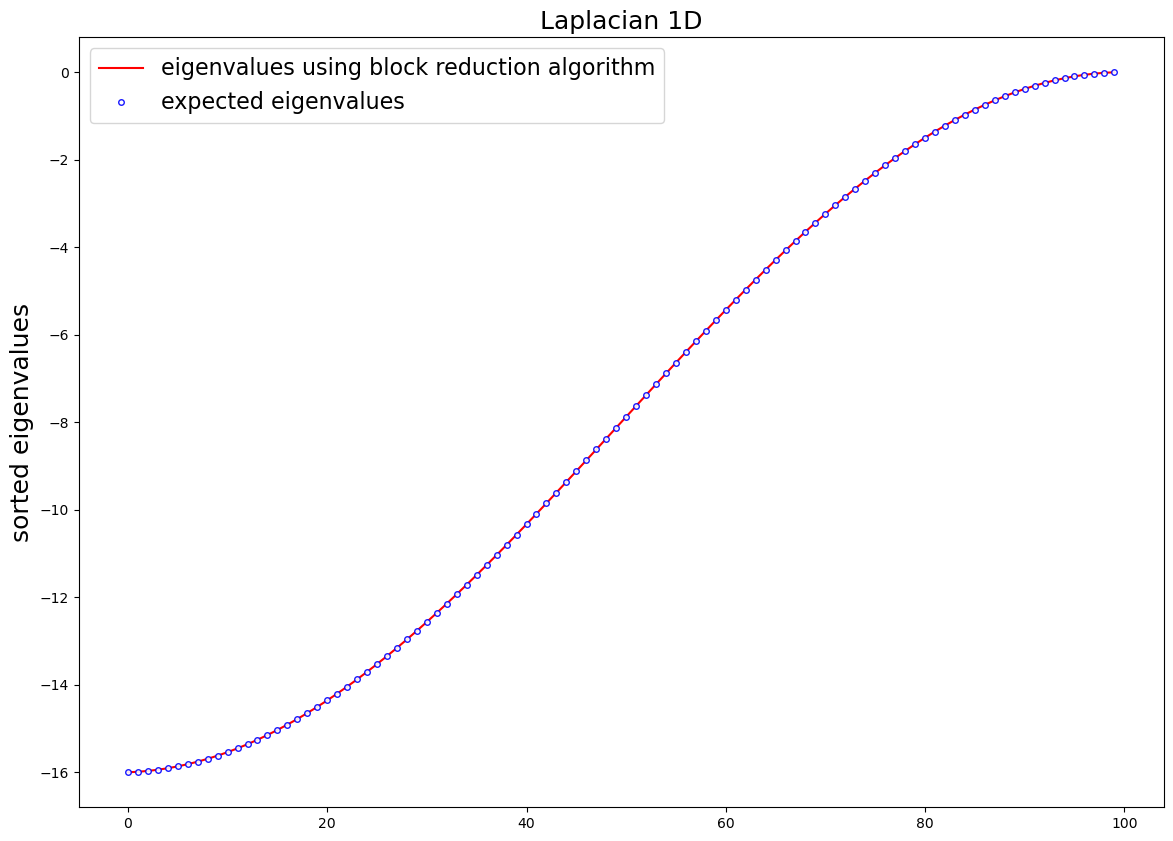

In [7]:
#fig = plt.figure(figsize=(14,10))
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(eigvals1d, color='red', label='eigenvalues using block reduction algorithm')
ax.plot(full_matrix, 'o', label='expected eigenvalues',
        markerfacecolor='white', markeredgecolor='blue', alpha=0.9,  markersize=4)
#ax.set_xlabel('numbers of eigenvalues', fontsize=18)
ax.set_ylabel('sorted eigenvalues', fontsize=18)
ax.set_title('Laplacian 1D',fontsize=18 )
plt.legend(fontsize=16)

plt.show()